In [71]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import gc, copy
from gensim.models import Word2Vec # categorical feature to vectors
# from random import shuffle
import hypertools as hyp

from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')


import numpy as np

In [42]:
def missing_zero_values_table(df):
#         zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [43]:
# loading the data
df_raw = pd.read_csv("cd_data_July_2021.csv")
print (df_raw.shape)
df_raw.head()

(10000, 53)


,_d_diff_ref_rend_provider,_d_more_than_one_cpt_per_claim_per_day,admission_date,age_of_patient_at_service,benefits_assignment_certification_indicator,billing_provider,billing_provider_city,billing_provider_postal_code,claim_creation_date,claim_filing_indicator_code,claim_frequency_type_code,claim_level_charge_amount,claim_submitter_id,clia_number,condition_code,days_to_claim_submission,diagnosis_count,discharge_date,drug_code_category,drug_quantity,facility_code_value,line_item_charge_amount,line_item_id,modifiers_count,ordering_provider,other_insured_group,other_payer1,other_payer2,other_subscriber1_prsn,other_subscriber2_prsn,pat_MRN,pat_relationship_wt_insured,patient_Gender,patient_PostalCode,patient_StateProvinceCode,patient_city,payer_city,payer_name,payer_postal_code,payer_state_province_code,principalDx_CCSR_Category1,prior_authorization_number,proc_hcpcs_category,procedure_modifier,referring_provider,related_causes_code,rendering_provider,service_date,service_unit_quantity,subscriber_policy_type,subscriber_prsn,supervising_provider,denialFlag
0,0,0,NaN,52.0,Y,billing_provider_0,city_92,postal_code_1050,2018-11-30,MC,1,77.68,6423,14356,NaN,5,1,NaN,Vaccine_Viral_-Influenza_A_and_B,1.0,11,44.6,6423_1,0,ordering_provider_5,NaN,NaN,NaN,NaN,NaN,11412.0,NaN,F,postal_code_765,state_15,city_92,city_16,payer_80,postal_code_98,state_15,FAC016,NaN,immunization_administration_for_vaccines/toxoids,NaN,referring_provider_4,NaN,rendering_provider_4,2018-11-25,1,NaN,P,NaN,1
1,0,0,NaN,29.0,Y,billing_provider_1,city_92,postal_code_638,2019-05-15,MC,1,382.30,17247,14356,NaN,102,4,NaN,NaN,NaN,22,133.2,17247_2,0,ordering_provider_12,NaN,NaN,NaN,NaN,NaN,13292.0,NaN,M,postal_code_1509,state_15,city_65,city_16,payer_3,postal_code_98,state_15,GEN002,NaN,Hospital_observation_services,NaN,referring_provider_4,NaN,rendering_provider_4,2019-02-03,1,NaN,P,NaN,1
2,0,0,NaN,79.0,Y,billing_provider_0,city_92,postal_code_1050,2018-07-26,MB,1,187.00,14405,14356,NaN,2,1,NaN,NaN,NaN,11,187.0,14405_1,0,ordering_provider_10,NaN,payer_53,NaN,S,NaN,13356.0,NaN,M,postal_code_407,state_15,city_71,city_41,payer_31,postal_code_54,state_1,DIG010,NaN,Office/other_outpatient_services,NaN,referring_provider_9,NaN,rendering_provider_9,2018-07-24,1,NaN,P,NaN,1
3,0,0,NaN,18.0,Y,billing_provider_0,city_92,postal_code_1412,2019-06-12,MC,1,115.00,20401,14356,NaN,3,1,NaN,NaN,NaN,11,115.0,20401_1,0,ordering_provider_5,NaN,NaN,NaN,NaN,NaN,11407.0,NaN,M,postal_code_1132,state_15,city_92,city_16,payer_3,postal_code_98,state_15,INJ041,NaN,Office/other_outpatient_services,NaN,referring_provider_4,NaN,rendering_provider_4,2019-06-09,1,NaN,P,NaN,1
4,0,0,NaN,81.0,Y,billing_provider_0,city_92,postal_code_1050,2018-02-07,MB,1,91.80,7157,14356,NaN,13,2,NaN,NaN,NaN,11,91.8,7157_1,0,ordering_provider_4,NaN,NaN,NaN,NaN,NaN,13946.0,NaN,F,postal_code_406,state_15,city_92,city_41,payer_31,postal_code_54,state_1,FAC008,NaN,Office/other_outpatient_services,NaN,referring_provider_3,NaN,rendering_provider_3,2018-01-25,1,NaN,P,NaN,1


### Explicit data type conversion


In [44]:
intTypeList =["age_of_patient_at_service",
#                 "claim_level_charge_amount",
                "days_to_claim_submission",
                "diagnosis_count",
                "drug_quantity",
                "line_item_charge_amount",
                "modifiers_count",
                "service_unit_quantity", 
              "claim_level_charge_amount"]

# floatTypeList = [ "claim_level_charge_amount"]


strTypeList = ["billing_provider",
                "billing_provider_city",
                "billing_provider_postal_code",
                "claim_submitter_id",
                "clia_number",
                "line_item_id",
                "ordering_provider",
                "pat_MRN",
                "patient_StateProvinceCode",
                "patient_city",
                "payer_city",
                "payer_name",
                "payer_postal_code",
                "payer_state_province_code",
                "prior_authorization_number",
                "referring_provider",
                "rendering_provider",
                "supervising_provider",
                "_d_diff_ref_rend_provider",
                "_d_more_than_one_cpt_per_claim_per_day",
                "benefits_assignment_certification_indicator",
                "claim_filing_indicator_code",
                "claim_frequency_type_code",
                "condition_code",
                "drug_code_category",
                "facility_code_value",
                "other_insured_group",
                "other_payer1",
                "other_payer2",
                "other_subscriber1_prsn",
                "other_subscriber2_prsn",
                "pat_relationship_wt_insured",
                "patient_Gender",
                "patient_PostalCode",
                "principalDx_CCSR_Category1",
                "proc_hcpcs_category",
                "procedure_modifier",
                "related_causes_code",
                "subscriber_policy_type",
                "subscriber_prsn",
                "denialFlag"
                ]

dataTypeList = ["admission_date",
                "claim_creation_date",
                "discharge_date",
                "service_date"]

# print (len(intTypeList) +  len(strTypeList) + len(dataTypeList))

df_raw[intTypeList] = df_raw[intTypeList].apply(pd.to_numeric, errors='coerce')
df_raw[strTypeList] = df_raw[strTypeList].astype(object)

for i in range(len(dataTypeList)):
    df_raw[dataTypeList[i]] = pd.to_datetime(df_raw[dataTypeList[i]], format="%Y-%m-%d")


#### Droping the missing columns that having more or equal to 75% 

In [45]:
# Delete columns containing either 80% or more than 80% NaN Values
perc = 75
min_count =  int(((100-perc)/100)*df_raw.shape[0] + 1)
mod_df = df_raw.dropna( axis=1, thresh=min_count)
# print (df_raw.shape)
mod_df.shape


(10000, 39)

In [46]:
# Integer Columns

temp = list(set(intTypeList).difference(set(mod_df.columns.tolist())))
print ("columns removed = ", temp)
for i in range(len(temp)):
    intTypeList.remove(temp[i])
    
int_df = mod_df[intTypeList]

print (int_df.shape)

# https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age
int_df["age_of_patient_Group_customize"] = pd.cut(int_df["age_of_patient_at_service"],\
                 [-1, 1, 4, 12, 19, 39, 59, np.inf],\
                 labels=['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Age Adult', 'Senior Adult'])

scaler = StandardScaler()
scaler.fit(int_df.drop(["age_of_patient_Group_customize"], axis = 1))
scaled_features = scaler.transform(int_df.drop(["age_of_patient_Group_customize"], axis = 1))
scaled_features_df = pd.DataFrame(scaled_features,columns=int_df.drop(["age_of_patient_Group_customize"], axis = 1).columns)
scaled_features_df["age_of_patient_Group_customize"] = int_df[["age_of_patient_Group_customize"]]

int_df = scaled_features_df.copy(deep = True)

print (int_df.shape)
int_df.head()

columns removed =  ['drug_quantity']
(10000, 7)
(10000, 8)


,age_of_patient_at_service,days_to_claim_submission,diagnosis_count,line_item_charge_amount,modifiers_count,service_unit_quantity,claim_level_charge_amount,age_of_patient_Group_customize
0,0.296679,-0.533557,-0.791473,-0.338453,-0.160897,-0.014581,-0.410676,Middle Age Adult
1,-0.419674,0.328220,0.417129,-0.166447,-0.160897,-0.014581,-0.001567,Adult
2,1.137615,-0.560210,-0.791473,-0.062002,-0.160897,-0.014581,-0.263858,Senior Adult
3,-0.762277,-0.551326,-0.791473,-0.201781,-0.160897,-0.014581,-0.360555,Teen
4,1.199907,-0.462483,-0.388606,-0.246820,-0.160897,-0.014581,-0.391713,Senior Adult


In [47]:
# dates Columns

temp = list(set(dataTypeList).difference(set(mod_df.columns.tolist())))
print ("columns removed = ",temp)
for i in range(len(temp)):
    dataTypeList.remove(temp[i])
    
dates_df =  mod_df[dataTypeList]

dates_df["serviceToClaimDays"] = (dates_df['claim_creation_date'] - dates_df['service_date']).dt.days

# Assumption

temp = dates_df[dates_df["serviceToClaimDays"] > 365]
print (temp.shape)
print (temp["serviceToClaimDays"].min())
print (temp["serviceToClaimDays"].max())

print (dates_df.shape)
dates_df.head()

columns removed =  ['admission_date', 'discharge_date']
(203, 3)
366
1495
(10000, 3)


,claim_creation_date,service_date,serviceToClaimDays
0,2018-11-30,2018-11-25,5
1,2019-05-15,2019-02-03,101
2,2018-07-26,2018-07-24,2
3,2019-06-12,2019-06-09,3
4,2018-02-07,2018-01-25,13


In [48]:
# Categorical Columns

temp = list(set(strTypeList).difference(set(mod_df.columns.tolist())))
print ("columns removed = ",temp)
for i in range(len(temp)):
    strTypeList.remove(temp[i])
    
    
str_df =  mod_df[strTypeList]

# drop the columns that are not selected for modeling
columns_drop_list = ["billing_provider_city", "claim_submitter_id", "clia_number", "line_item_id", "pat_MRN"]
#                      "other_payer2" ]

# print (str_df.shape)

str_df.drop(columns_drop_list, inplace = True, axis = 1)
print (str_df.shape)

missing_zero_values_table(str_df)

#fill the missing value with "Unknown"
str_df = str_df.fillna(value="Unknown")
print (str_df.shape)
str_df.head()

columns removed =  ['drug_code_category', 'procedure_modifier', 'other_subscriber2_prsn', 'other_payer2', 'pat_relationship_wt_insured', 'condition_code', 'supervising_provider', 'other_insured_group', 'related_causes_code', 'prior_authorization_number', 'subscriber_policy_type']
(10000, 25)
Your selected dataframe has 25 columns and 10000 Rows.
There are 5 columns that have missing values.
(10000, 25)


,billing_provider,billing_provider_postal_code,ordering_provider,patient_StateProvinceCode,patient_city,payer_city,payer_name,payer_postal_code,payer_state_province_code,referring_provider,rendering_provider,_d_diff_ref_rend_provider,_d_more_than_one_cpt_per_claim_per_day,benefits_assignment_certification_indicator,claim_filing_indicator_code,claim_frequency_type_code,facility_code_value,other_payer1,other_subscriber1_prsn,patient_Gender,patient_PostalCode,principalDx_CCSR_Category1,proc_hcpcs_category,subscriber_prsn,denialFlag
0,billing_provider_0,postal_code_1050,ordering_provider_5,state_15,city_92,city_16,payer_80,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,11,Unknown,Unknown,F,postal_code_765,FAC016,immunization_administration_for_vaccines/toxoids,P,1
1,billing_provider_1,postal_code_638,ordering_provider_12,state_15,city_65,city_16,payer_3,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,22,Unknown,Unknown,M,postal_code_1509,GEN002,Hospital_observation_services,P,1
2,billing_provider_0,postal_code_1050,ordering_provider_10,state_15,city_71,city_41,payer_31,postal_code_54,state_1,referring_provider_9,rendering_provider_9,0,0,Y,MB,1,11,payer_53,S,M,postal_code_407,DIG010,Office/other_outpatient_services,P,1
3,billing_provider_0,postal_code_1412,ordering_provider_5,state_15,city_92,city_16,payer_3,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,11,Unknown,Unknown,M,postal_code_1132,INJ041,Office/other_outpatient_services,P,1
4,billing_provider_0,postal_code_1050,ordering_provider_4,state_15,city_92,city_41,payer_31,postal_code_54,state_1,referring_provider_3,rendering_provider_3,0,0,Y,MB,1,11,Unknown,Unknown,F,postal_code_406,FAC008,Office/other_outpatient_services,P,1


In [49]:
colNames = list(str_df.columns)

tempDummy= pd.DataFrame()

tempDummy = str_df.copy(deep = True)   

In [50]:
def apply_w2v(sentences, model, num_features):
    def _average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        n_words = 0.
        for word in words:
            if word in vocabulary: 
                n_words = n_words + 1.
                feature_vector = np.add(feature_vector, model.wv[word])

        if n_words:
            feature_vector = np.divide(feature_vector, n_words)
        return feature_vector
    
    vocab = set(model.wv.index_to_key)
    feats = [_average_word_vectors(s, model, vocab, num_features) for s in sentences]
    return np.array(feats)



def gen_cat2vec_sentences(data):
    X_w2v = copy.deepcopy(data)
    names = list(X_w2v.columns.values)
    for c in names:
        X_w2v[c] = X_w2v[c].fillna('unknow').astype('category')
        X_w2v[c].cat.categories = ["%s %s" % (c,g) for g in X_w2v[c].cat.categories]
    X_w2v = X_w2v.values.tolist()
    return X_w2v


def fit_cat2vec_model():
    X_w2v = gen_cat2vec_sentences(daset.loc[:,cat_cols])
#     for i in X_w2v:
#         shuffle(i)
    model = Word2Vec(X_w2v, vector_size=n_cat2vec_feature, window=n_cat2vec_window)
    return model


In [51]:
str_df_embb = str_df.drop(["denialFlag"], axis =1)
str_df_embb = str_df_embb.astype(str)

cat_cols = str_df_embb.columns.tolist()
daset = str_df_embb.copy()


print('Cat2Vec...')
# n_cat2vec_feature  = len(cat_cols) # define the cat2vecs dimentions
# n_cat2vec_window   = len(cat_cols) * 2 # define the w2v window size


n_cat2vec_feature  = 100 # define the cat2vecs dimentions
n_cat2vec_window   = 200  # define the w2v window size



print('Fit cat2vec model')
c2v_model = fit_cat2vec_model()

print('apply_w2v for cat2vec')
tr_c2v_matrix = apply_w2v(gen_cat2vec_sentences(daset[cat_cols]), c2v_model, n_cat2vec_feature)
# te_c2v_matrix = apply_w2v(gen_cat2vec_sentences(daset[cat_cols]), c2v_model, n_cat2vec_feature)



Cat2Vec...
Fit cat2vec model
apply_w2v for cat2vec


In [52]:
emb_features = pd.DataFrame(tr_c2v_matrix.tolist())
emb_features.columns = ["embedding_" +str(col)  for col in emb_features.columns]
print (emb_features.shape)

(10000, 100)


### combine all the dataset

In [53]:
final_data = pd.concat([int_df, dates_df, emb_features], axis = 1)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
age_sparse_data = pd.DataFrame (encoder.fit_transform(final_data[["age_of_patient_Group_customize"]]))
age_sparse_data.columns = encoder.get_feature_names(["age_of_patient_Group"])

final_data = pd.concat([final_data, age_sparse_data, df_raw["denialFlag"]], axis = 1)
final_data.drop(["age_of_patient_Group_customize", "claim_creation_date", "service_date"], axis = 1, inplace = True)

final_data["denialFlag"] = final_data["denialFlag"].astype(int)
print (final_data.shape)
final_data.head(2)

(10000, 116)


,age_of_patient_at_service,days_to_claim_submission,diagnosis_count,line_item_charge_amount,modifiers_count,service_unit_quantity,claim_level_charge_amount,serviceToClaimDays,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12,embedding_13,embedding_14,embedding_15,embedding_16,embedding_17,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30,embedding_31,embedding_32,embedding_33,embedding_34,embedding_35,embedding_36,embedding_37,embedding_38,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,embedding_50,embedding_51,embedding_52,embedding_53,embedding_54,embedding_55,embedding_56,embedding_57,embedding_58,embedding_59,embedding_60,embedding_61,embedding_62,embedding_63,embedding_64,embedding_65,embedding_66,embedding_67,embedding_68,embedding_69,embedding_70,embedding_71,embedding_72,embedding_73,embedding_74,embedding_75,embedding_76,embedding_77,embedding_78,embedding_79,embedding_80,embedding_81,embedding_82,embedding_83,embedding_84,embedding_85,embedding_86,embedding_87,embedding_88,embedding_89,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,age_of_patient_Group_Adult,age_of_patient_Group_Child,age_of_patient_Group_Infant,age_of_patient_Group_Middle Age Adult,age_of_patient_Group_Senior Adult,age_of_patient_Group_Teen,age_of_patient_Group_Toddler,denialFlag
0,0.296679,-0.533557,-0.791473,-0.338453,-0.160897,-0.014581,-0.410676,5,-0.293215,0.235757,-0.175710,-0.404864,0.179961,-0.224566,-0.207213,0.493945,-0.137340,-0.455672,0.016936,-0.397680,-0.240845,0.314948,0.349692,-0.250693,0.518645,-0.148324,0.380088,-0.258851,0.360544,0.450188,0.399908,-0.051443,0.000558,0.055505,-0.247668,-0.014426,-0.261138,0.070992,0.100037,-0.239641,0.122246,-0.560815,-0.376077,0.444493,-0.402110,0.122001,-0.05537,-0.140144,0.02446,-0.357910,-0.073426,0.349971,0.331193,0.366498,-0.242536,-0.142250,-0.073206,-0.052988,0.103619,-0.166714,0.139600,-0.205751,0.113027,-0.300920,0.118081,-0.330402,0.194470,0.049894,-0.049570,-0.063291,0.091717,0.265705,0.201721,0.507097,-0.325564,0.540455,-0.537318,0.336636,0.313221,0.145203,0.826022,0.400680,0.613879,-0.087971,0.013067,0.012555,-0.051600,-0.268482,-0.564586,-0.522487,-0.221143,0.709078,0.318396,-0.173663,0.675419,-0.069750,0.341610,-0.088328,0.638137,0.370895,0.564361,-0.051161,0.054354,0.636987,0.004402,0.064867,0.112443,0.133471,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,-0.419674,0.328220,0.417129,-0.166447,-0.160897,-0.014581,-0.001567,101,-0.517475,0.334589,-0.220932,-0.356338,0.006821,-0.265198,-0.210218,0.305952,0.074399,-0.309460,0.032309,-0.607609,-0.465383,0.236039,0.077404,-0.124138,0.158953,0.011799,0.287201,-0.075056,0.330172,0.073682,0.139286,0.290056,-0.122101,0.129081,-0.129570,0.230677,0.016422,-0.191174,-0.006264,-0.120785,0.335864,-0.425526,-0.039024,0.482253,-0.044808,0.115857,-0.05510,-0.071004,-0.10529,-0.014695,-0.223602,0.038757,0.306666,-0.223158,-0.119148,-0.220366,0.102424,-0.114282,0.210625,-0.183963,0.093723,-0.418649,0.145684,-0.288364,0.015506,-0.207130,0.332676,0.006182,-0.174249,-0.154448,0.023116,0.034415,-0.092786,0.241367,0.032309,0.807662,-0.341187,0.646495,0.290725,-0.075698,0.582291,0.452441,0.396781,0.304903,0.012932,-0.425771,0.122387,0.114929,-0.683563,-0.316973,0.020645,0.601882,0.377019,-0.281936,0.578304,0.135061,0.342985,0.006121,0.370295,0.278081,0.640134,0.149128,0.287673,0.809398,0.074345,0.114557,0.086639,0.229697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
# Frequency of the denialFlag
final_data["denialFlag"].value_counts()/len(final_data) *100

0    70.0
1    30.0
Name: denialFlag, dtype: float64

### Create Train, Test and Validation Data set


In [55]:
final_data_0 = final_data[final_data["denialFlag"]==0]
final_data_1 = final_data[final_data["denialFlag"]==1]

In [68]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split( final_data_0.loc[:, ~final_data_0.columns.isin(['denialFlag'])],\
                                                    final_data_0["denialFlag"], test_size=0.30, random_state=42)

# print (X_train_0.shape[0] )
# print (X_test_0.shape[0] )

# print (X_train_0.shape[0] + X_test_0.shape[0])
# print (y_train_0.shape[0] + y_test_0.shape[0])

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( final_data_1.loc[:, ~final_data_1.columns.isin(['denialFlag'])],\
                                                    final_data_1["denialFlag"], test_size=0.10, random_state=42)
# print (X_train_1.shape[0] )
# print (X_test_1.shape[0] )

# print (X_train_1.shape[0] + X_test_1.shape[0])
# print (y_train_1.shape[0] + y_test_1.shape[0])


# Test and Validation data set
X_test_0, X_val_0, y_test_0, y_val_0 = train_test_split( X_test_0, y_test_0, test_size=0.10, random_state=42)
# print (X_val_0.shape[0])
# print (X_test_0.shape[0])
# print (X_val_0.shape[0] + X_test_0.shape[0])

##############################
X_test_1, X_val_1, y_test_1, y_val_1 = train_test_split( X_test_1, y_test_1, test_size=0.10, random_state=42)
# print (X_val_1.shape[0])
# print (X_test_1.shape[0])
# print (X_val_1.shape[0] + X_test_1.shape[0])

trainData_0 = pd.concat([X_train_0, y_train_0], axis = 1)
trainData_1 = pd.concat([X_train_1, y_train_1], axis = 1)
trainData = pd.concat([trainData_0, trainData_1], axis = 0)
# trainData.shape

testData_0 = pd.concat([X_test_0, y_test_0], axis = 1)
testData_1 = pd.concat([X_test_1, y_test_1], axis = 1)
testData = pd.concat([testData_0, testData_1], axis = 0)
# testData.shape


valData_0 = pd.concat([X_val_0, y_val_0], axis = 1)
valData_1 = pd.concat([X_val_1, y_val_1], axis = 1)
valData = pd.concat([valData_0, valData_1], axis = 0)
# valData.shape

trainData.shape[0] + testData.shape[0] + valData.shape[0]

10000

In [69]:
print ("train dataset shape is ", trainData.shape)
print ("test dataset shape is ", testData.shape)
print ("val dataset shape is ", valData.shape)

train dataset shape is  (7600, 116)
test dataset shape is  (2160, 116)
val dataset shape is  (240, 116)


In [70]:
# Trainf set "denialFlag" frequency
trainData["denialFlag"].value_counts()/len(trainData) *100

0    64.473684
1    35.526316
Name: denialFlag, dtype: float64

In [59]:

model = XGBClassifier(learning_rate =0.1,
                         n_estimators=1000,
                         max_depth=5,
                         min_child_weight=1,
                         gamma=0,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         objective= 'binary:logistic',
                         nthread=4,
                         scale_pos_weight=1,
                         seed=27)

model.fit(trainData.drop(['denialFlag'], axis = 1), trainData['denialFlag'])

[00:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [60]:
# plot_importance(model)
# model.feature_importances_

# Extract feature importances
fi = pd.DataFrame({'feature': list(trainData.drop(['denialFlag'], axis = 1).columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head(100)

,feature,importance
1,days_to_claim_submission,0.032139
7,serviceToClaimDays,0.024756
85,embedding_77,0.019133
99,embedding_91,0.017534
114,age_of_patient_Group_Toddler,0.011262
111,age_of_patient_Group_Middle Age Adult,0.011164
23,embedding_15,0.011120
5,service_unit_quantity,0.010955
16,embedding_8,0.010251
8,embedding_0,0.010210


<AxesSubplot:>

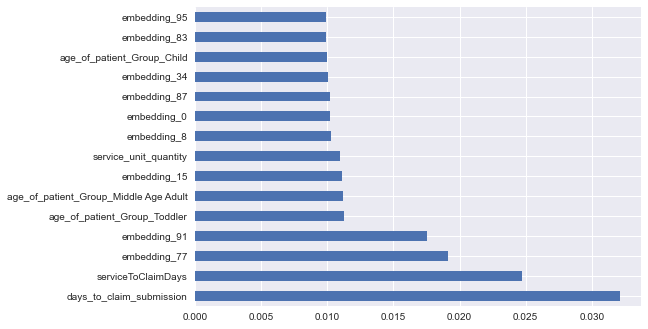

In [61]:
feat_importances = pd.Series(model.feature_importances_, index=trainData.drop(['denialFlag'], axis = 1).columns)
feat_importances.nlargest(15).plot(kind='barh')

In [62]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [63]:
# Add prediction probability to dataframe
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python#:~:text=Python%20code%3A&text=The%20optimal%20cut%20off%20point%20is%200.317628%2C%20so%20anything%20above,zero%20in%20the%20current%20example.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


data = trainData.copy()
rf_probs_list = model.predict_proba(data.drop(['denialFlag'], axis = 1))

rf_probs = rf_probs_list[:, 1]


fpr, tpr, thresholds =roc_curve(data['denialFlag'], rf_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

threshold = Find_Optimal_Cutoff(data['denialFlag'], rf_probs)
print (threshold)

##########
data["pred_proba"] = rf_probs
data['pred'] = [1 if x > threshold[0] else 0 for x in data['pred_proba']]


# evaluate predictions
accuracy = accuracy_score(data["denialFlag"], data["pred"])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(precision_score(data["denialFlag"], data["pred"], average="macro"))
print(recall_score(data["denialFlag"], data["pred"], average="macro")) 
print(f1_score(data["denialFlag"], data["pred"], average="macro"))

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(data['denialFlag'], data['pred'])


Area under the ROC curve : 0.999993
[0.4931315779685974]
Accuracy: 99.93%
0.9992405268391142
0.9993235071806501
0.9992819946807521


array([[4897,    3],
       [   2, 2698]], dtype=int64)

### Test dataset 

In [64]:
# Add prediction probability to dataframe
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python#:~:text=Python%20code%3A&text=The%20optimal%20cut%20off%20point%20is%200.317628%2C%20so%20anything%20above,zero%20in%20the%20current%20example.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

data = testData.copy()
rf_probs_list = model.predict_proba(data.drop(['denialFlag'], axis = 1))

rf_probs = rf_probs_list[:, 1]


fpr, tpr, thresholds =roc_curve(data['denialFlag'], rf_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

threshold = Find_Optimal_Cutoff(data['denialFlag'], rf_probs)
print (threshold)

##########
data["pred_proba"] = rf_probs
data['pred'] = [1 if x > threshold[0] else 0 for x in data['pred_proba']]


# evaluate predictions
accuracy = accuracy_score(data["denialFlag"], data["pred"])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("precision_score = ", precision_score(data["denialFlag"], data["pred"], average="micro"))
print("recall_score", recall_score(data["denialFlag"], data["pred"], average="micro")) 
print("f1_score", f1_score(data["denialFlag"], data["pred"], average="micro"))

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(data['denialFlag'], data['pred'])

print ("cohen_kappa_score = ", cohen_kappa_score(data["denialFlag"], data["pred"]))


Area under the ROC curve : 0.906637
[0.21887695789337158]
Accuracy: 81.57%
precision_score =  0.8157407407407408
recall_score 0.8157407407407408
f1_score 0.8157407407407408
cohen_kappa_score =  0.4269258459323254


0.9066372721928277


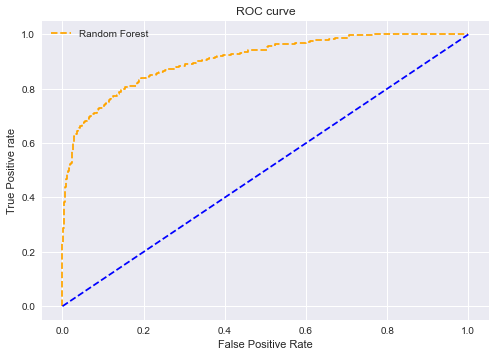

In [65]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(data["denialFlag"], rf_probs, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(data["denialFlag"]))]
p_fpr, p_tpr, _ = roc_curve(data["denialFlag"], random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(data["denialFlag"], rf_probs)

print(auc_score1)


import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Validation dataset

In [66]:
# Add prediction probability to dataframe
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python#:~:text=Python%20code%3A&text=The%20optimal%20cut%20off%20point%20is%200.317628%2C%20so%20anything%20above,zero%20in%20the%20current%20example.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


data = valData.copy()
rf_probs_list = model.predict_proba(data.drop(['denialFlag'], axis = 1))

rf_probs = rf_probs_list[:, 1]


fpr, tpr, thresholds =roc_curve(data['denialFlag'], rf_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# threshold = Find_Optimal_Cutoff(data['denialFlag'], rf_probs)
print (threshold)

##########
data["pred_proba"] = rf_probs
data['pred'] = [1 if x > threshold[0] else 0 for x in data['pred_proba']]


# evaluate predictions
accuracy = accuracy_score(data["denialFlag"], data["pred"])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("precision_score = ", precision_score(data["denialFlag"], data["pred"], average="micro"))
print("recall_score", recall_score(data["denialFlag"], data["pred"], average="micro")) 
print("f1_score", f1_score(data["denialFlag"], data["pred"], average="micro"))

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(data['denialFlag'], data['pred'])

print ("cohen_kappa_score = ", cohen_kappa_score(data["denialFlag"], data["pred"]))


Area under the ROC curve : 0.846667
[0.21887695789337158]
Accuracy: 80.83%
precision_score =  0.8083333333333333
recall_score 0.8083333333333333
f1_score 0.8083333333333333
cohen_kappa_score =  0.39869281045751637


0.8466666666666667


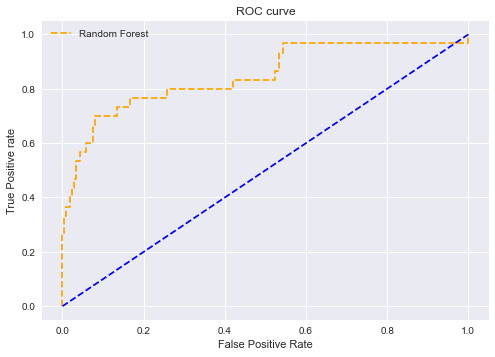

In [67]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(data["denialFlag"], rf_probs, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(data["denialFlag"]))]
p_fpr, p_tpr, _ = roc_curve(data["denialFlag"], random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(data["denialFlag"], rf_probs)

print(auc_score1)


import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();